In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
filename = "data_excluded/forestfires.csv"

names = [
    "X",
    "Y",
    "month",
    "day",
    "FFMC",
    "DMC",
    "DC",
    "ISI",
    "temp",
    "RH",
    "wind",
    "rain",
    "area",
]

df = pd.read_csv(filename, names=names)

In [4]:
# profiling
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title="Forest Fires Data Profiling Report", explorative=True)
# profile.to_file("data_excluded/forest_fires_profiling_report.html")

In [5]:
# check null
print(df.isnull().sum())

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [6]:
# descriptive statistics
print("shape of the dataset:")
print(df.shape)

print("\ntypes of the columns:")
print(df.dtypes)

print("\nhead:")
print(df.head())

print("\ndescriptive statistics:")
print(df.describe())

shape of the dataset:
(517, 13)

types of the columns:
X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

head:
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

descriptive statistics:
                X           Y        FFMC         DMC          DC         ISI        temp          RH        wind        rain         area
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000

In [7]:
# pearson correlation
print("\npearson correlation:") 
print(df.corr(method='pearson', numeric_only=True))


pearson correlation:
             X         Y      FFMC       DMC        DC       ISI      temp        RH      wind      rain      area
X     1.000000  0.539548 -0.021039 -0.048384 -0.085916  0.006210 -0.051258  0.085223  0.018798  0.065387  0.063385
Y     0.539548  1.000000 -0.046308  0.007782 -0.101178 -0.024488 -0.024103  0.062221 -0.020341  0.033234  0.044873
FFMC -0.021039 -0.046308  1.000000  0.382619  0.330512  0.531805  0.431532 -0.300995 -0.028485  0.056702  0.040122
DMC  -0.048384  0.007782  0.382619  1.000000  0.682192  0.305128  0.469594  0.073795 -0.105342  0.074790  0.072994
DC   -0.085916 -0.101178  0.330512  0.682192  1.000000  0.229154  0.496208 -0.039192 -0.203466  0.035861  0.049383
ISI   0.006210 -0.024488  0.531805  0.305128  0.229154  1.000000  0.394287 -0.132517  0.106826  0.067668  0.008258
temp -0.051258 -0.024103  0.431532  0.469594  0.496208  0.394287  1.000000 -0.527390 -0.227116  0.069491  0.097844
RH    0.085223  0.062221 -0.300995  0.073795 -0.039192 -0.

In [8]:
# convert month and day to categorical
df.month.replace({
    "jan": 1,
    "feb": 2,
    "mar": 3,   
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,   
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12
}, inplace=True)

df.day.replace({
    "mon": 1,
    "tue": 2,
    "wed": 3,
    "thu": 4,
    "fri": 5,
    "sat": 6,
    "sun": 7
}, inplace=True)

df.head()

C:\Users\traya\AppData\Local\Temp\ipykernel_38616\299477150.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.month.replace({
C:\Users\traya\AppData\Local\Temp\ipykernel_38616\299477150.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.month.replace({
C:\Users\traya\AppData\Local\Temp\ipyk

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


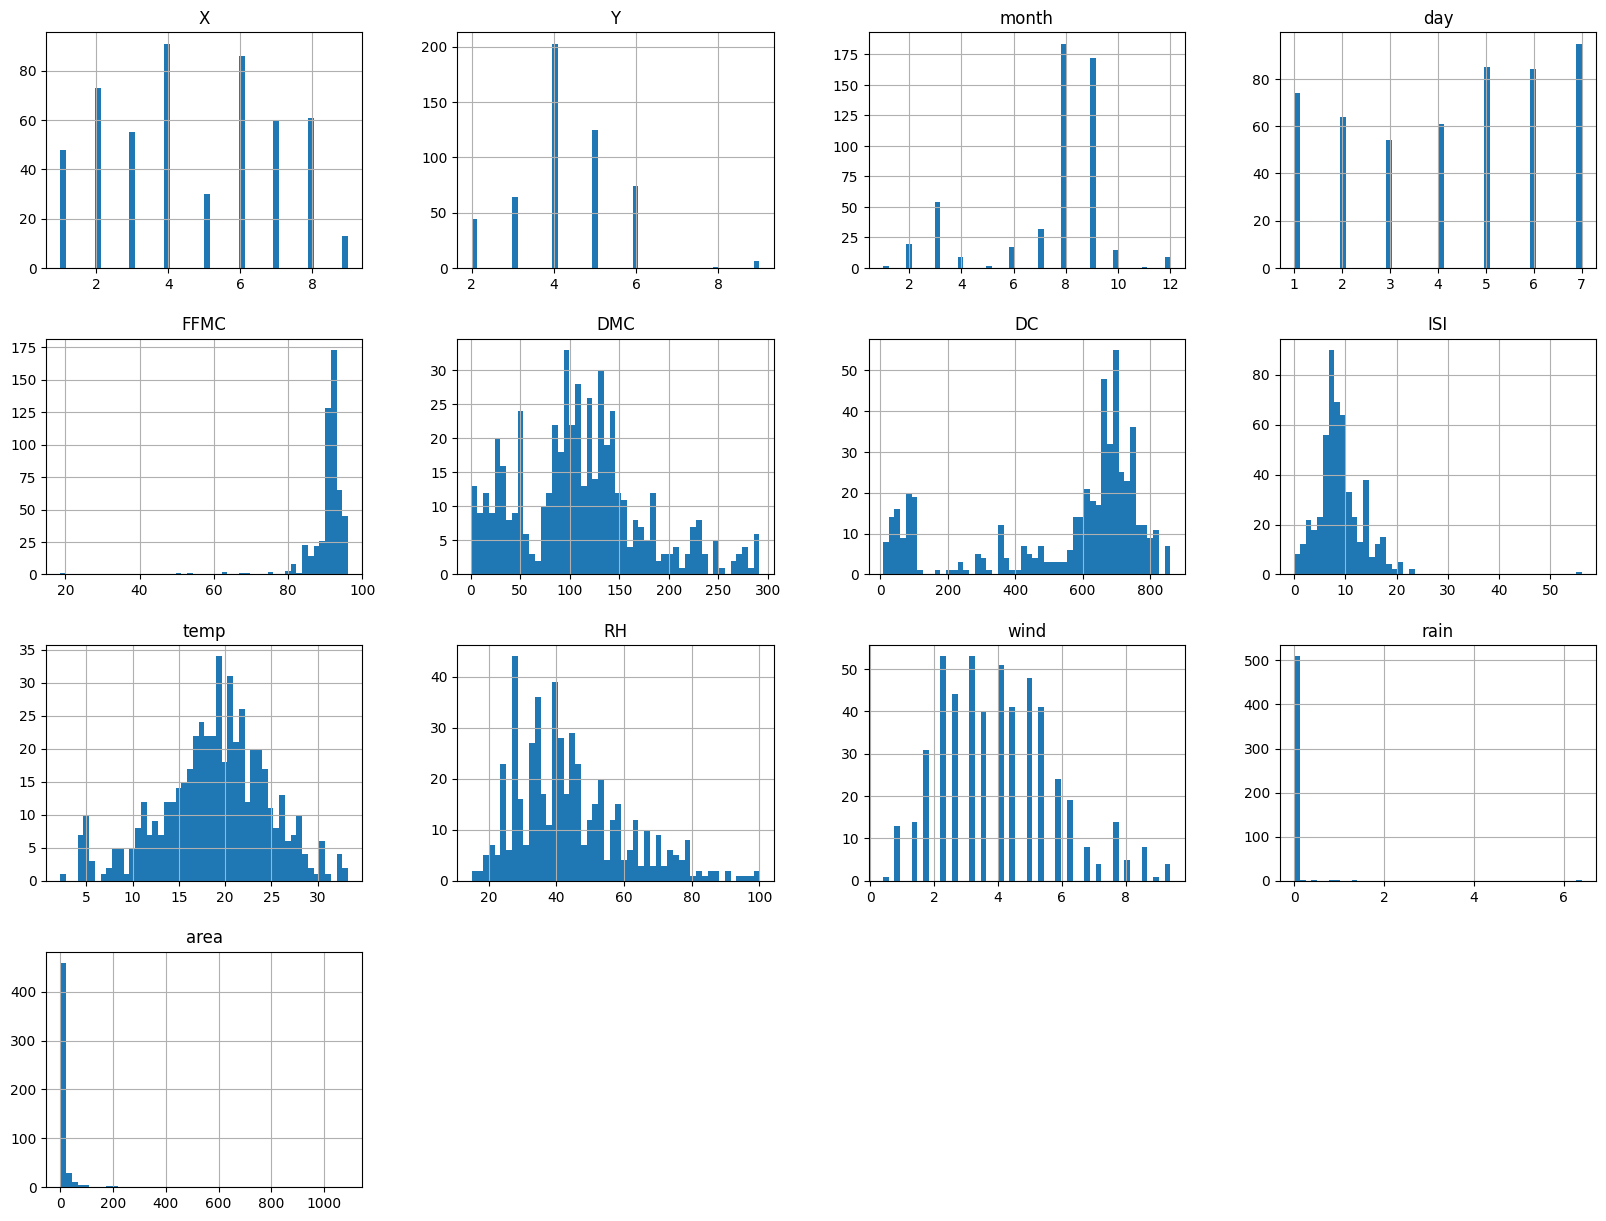

In [9]:
# histogram
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))
plt.show()

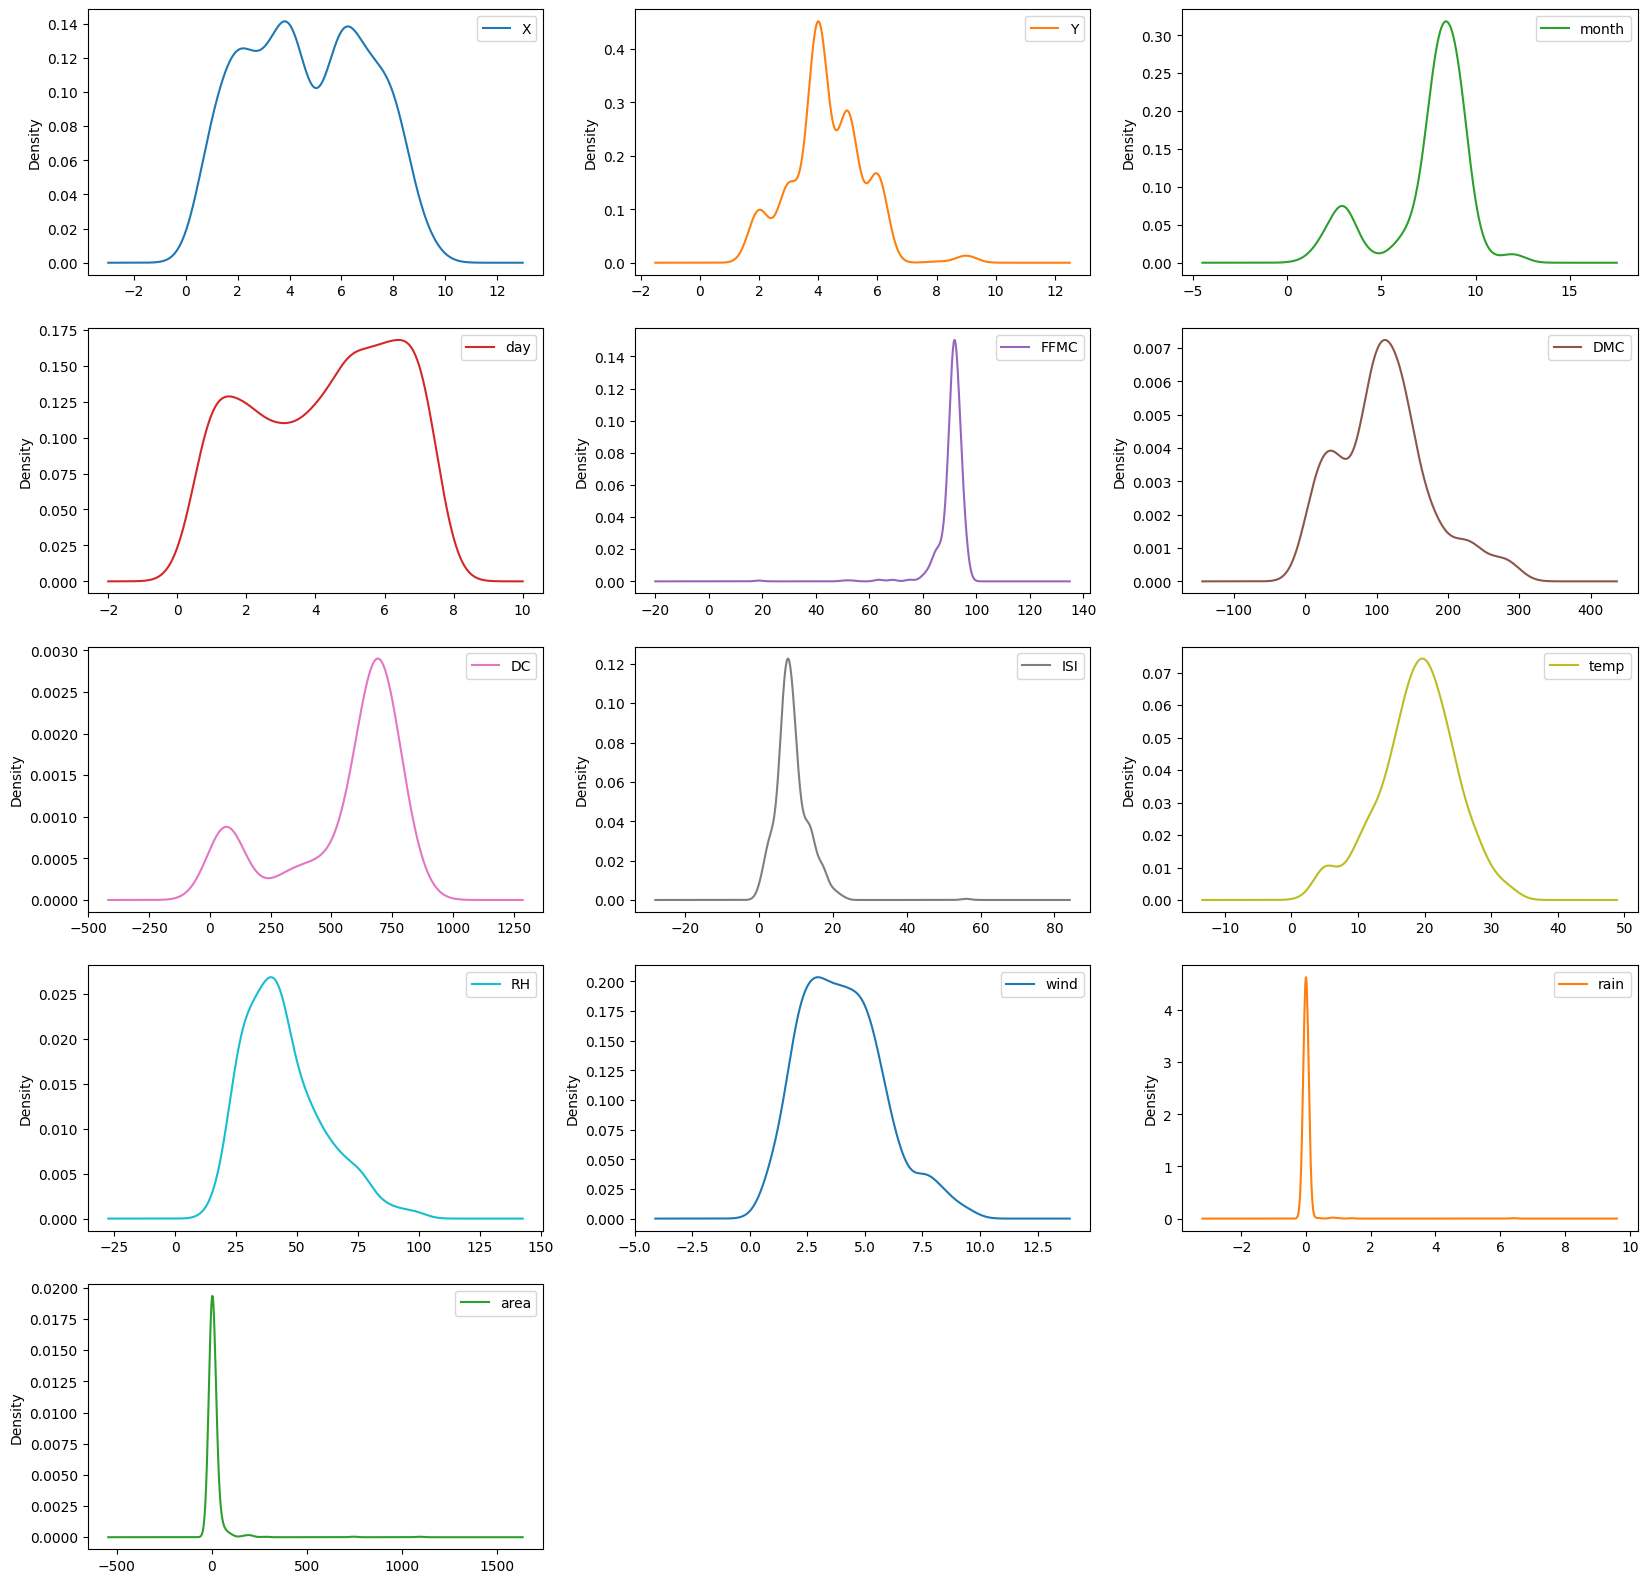

In [10]:
# density plot
df.plot(kind='density', subplots=True, layout=(5, 3), sharex=False, figsize=(20, 20))
plt.show()

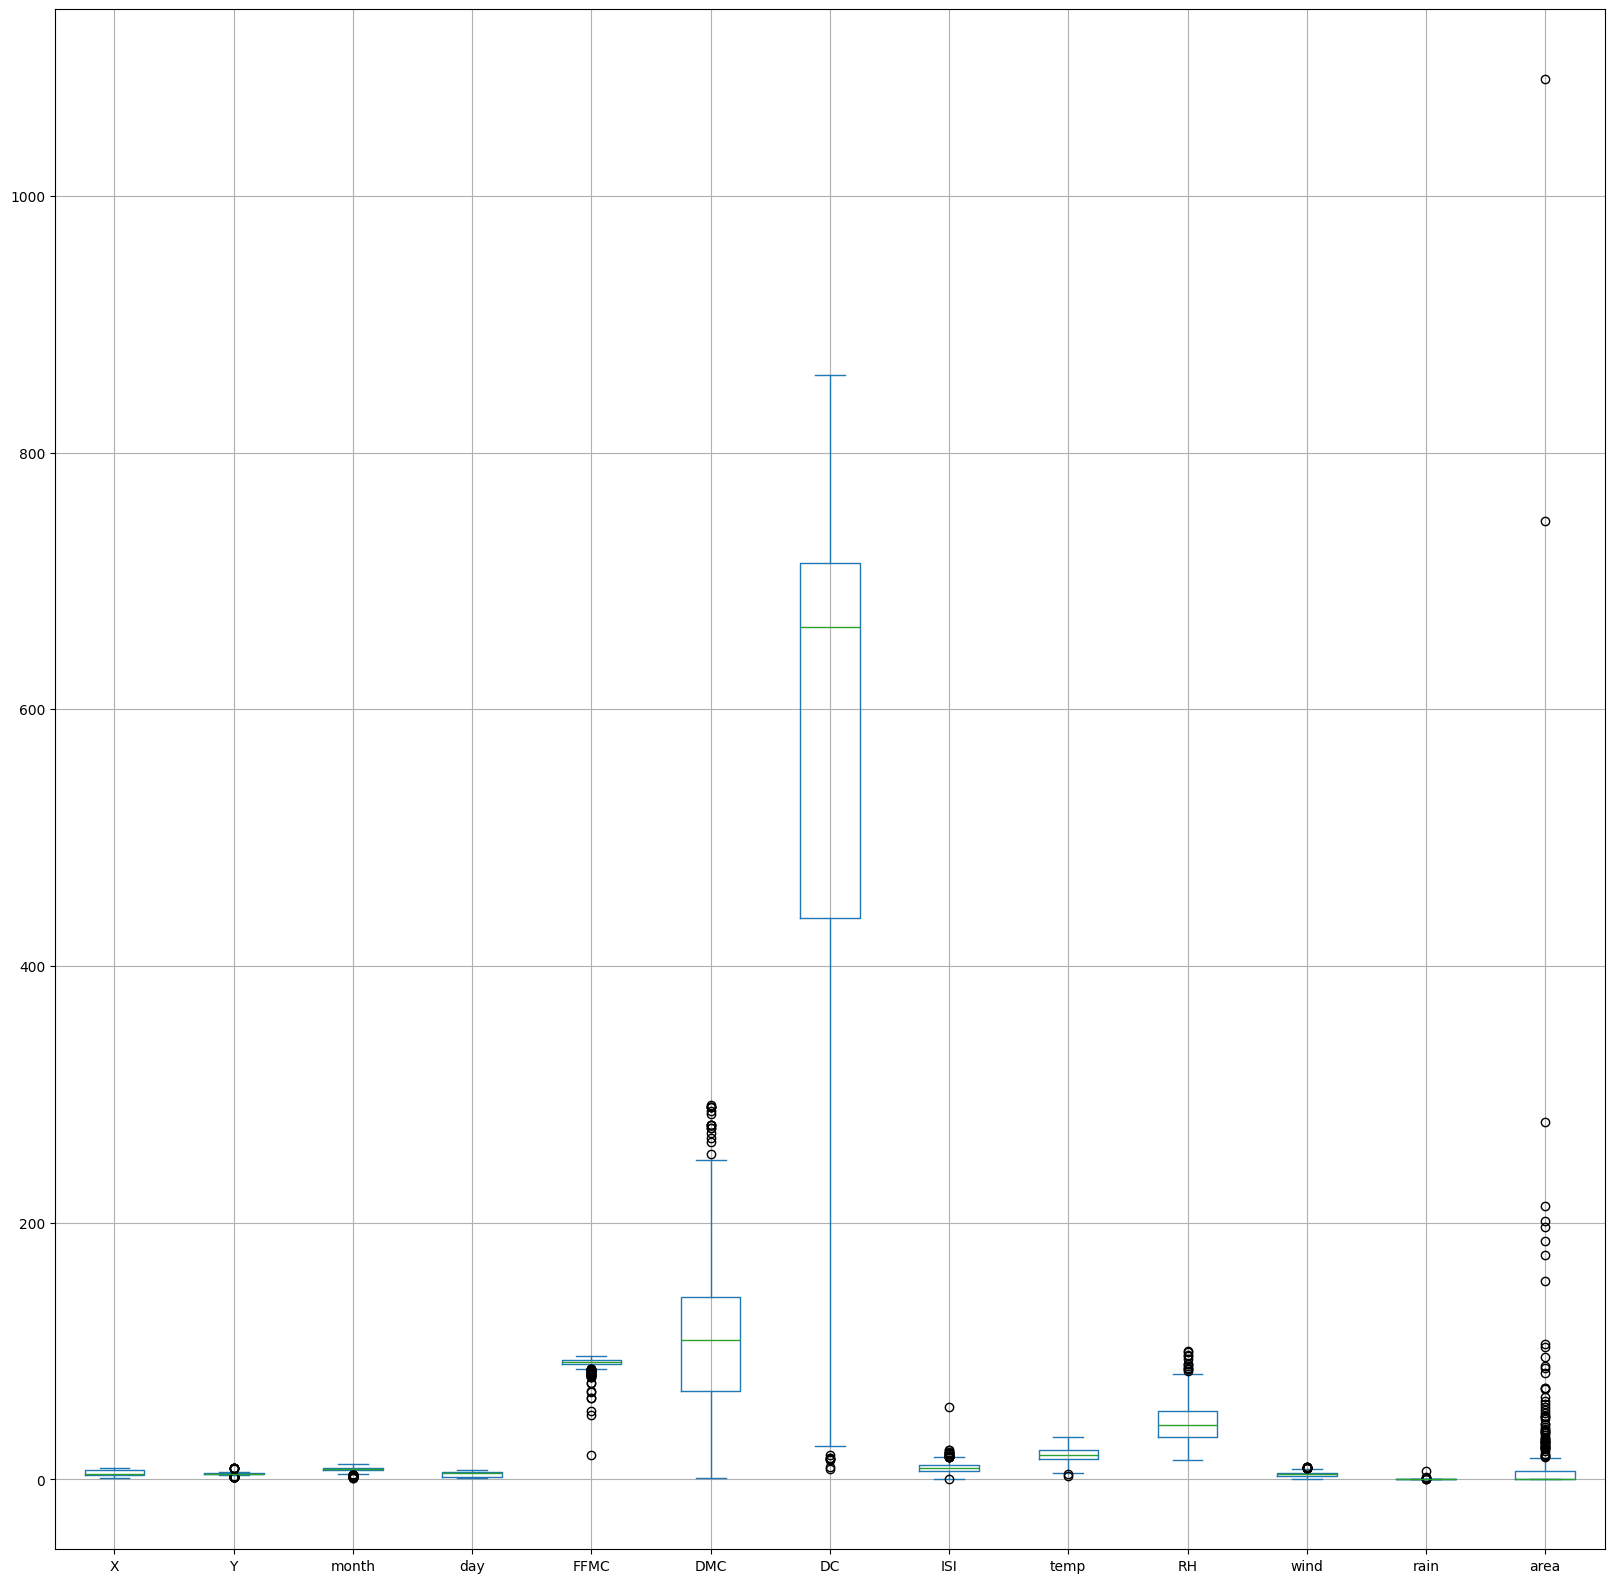

In [11]:
# box plot
df.plot(kind='box', subplots=False, layout=(5, 3), sharex=False, figsize=(20, 20), grid=True)
plt.show()

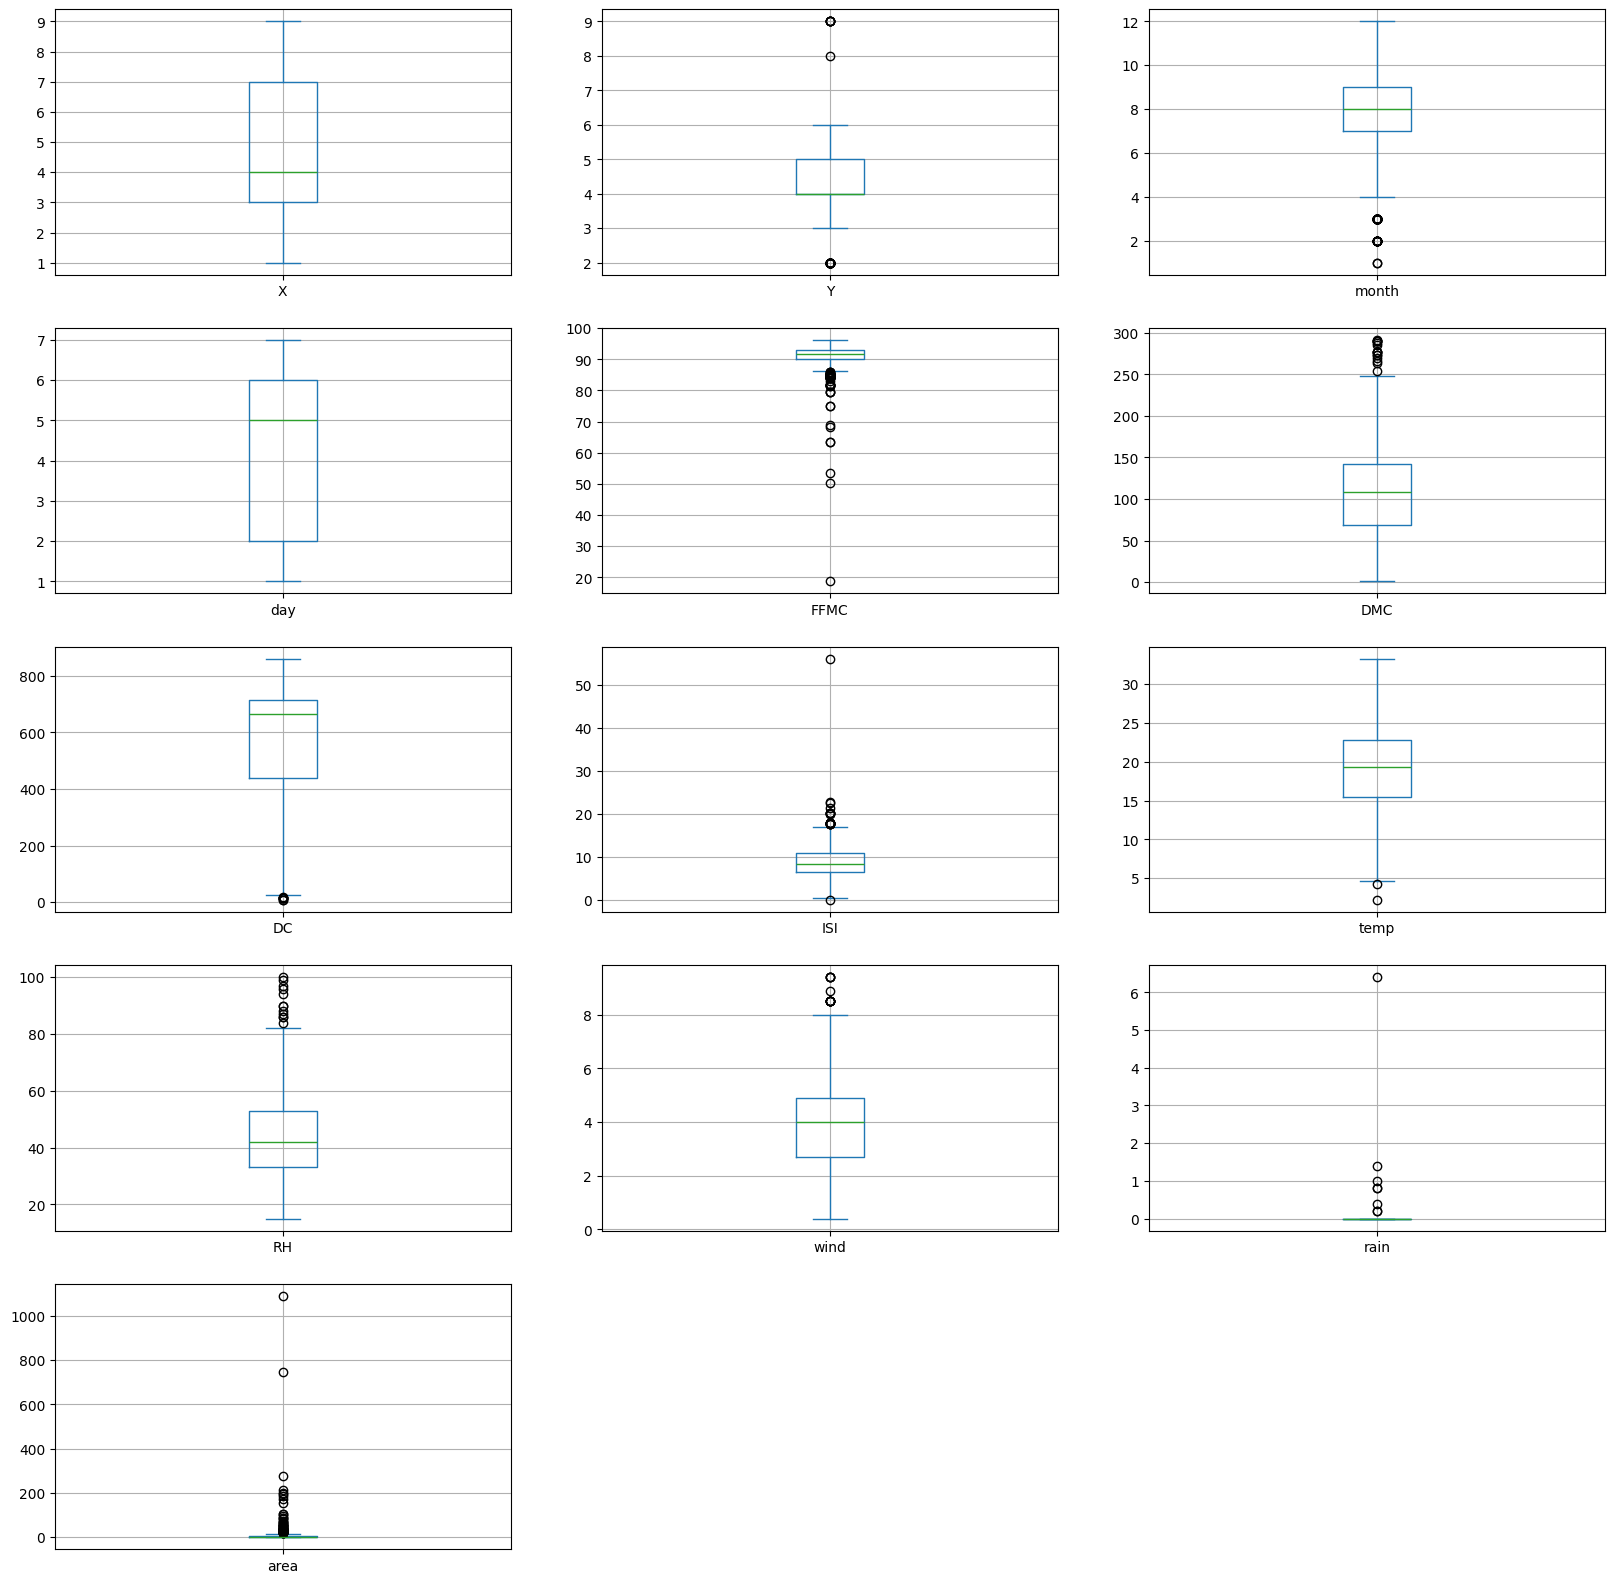

In [12]:
# box plot
df.plot(kind='box', subplots=True, layout=(5, 3), sharex=False, figsize=(20, 20), grid=True)
plt.show()

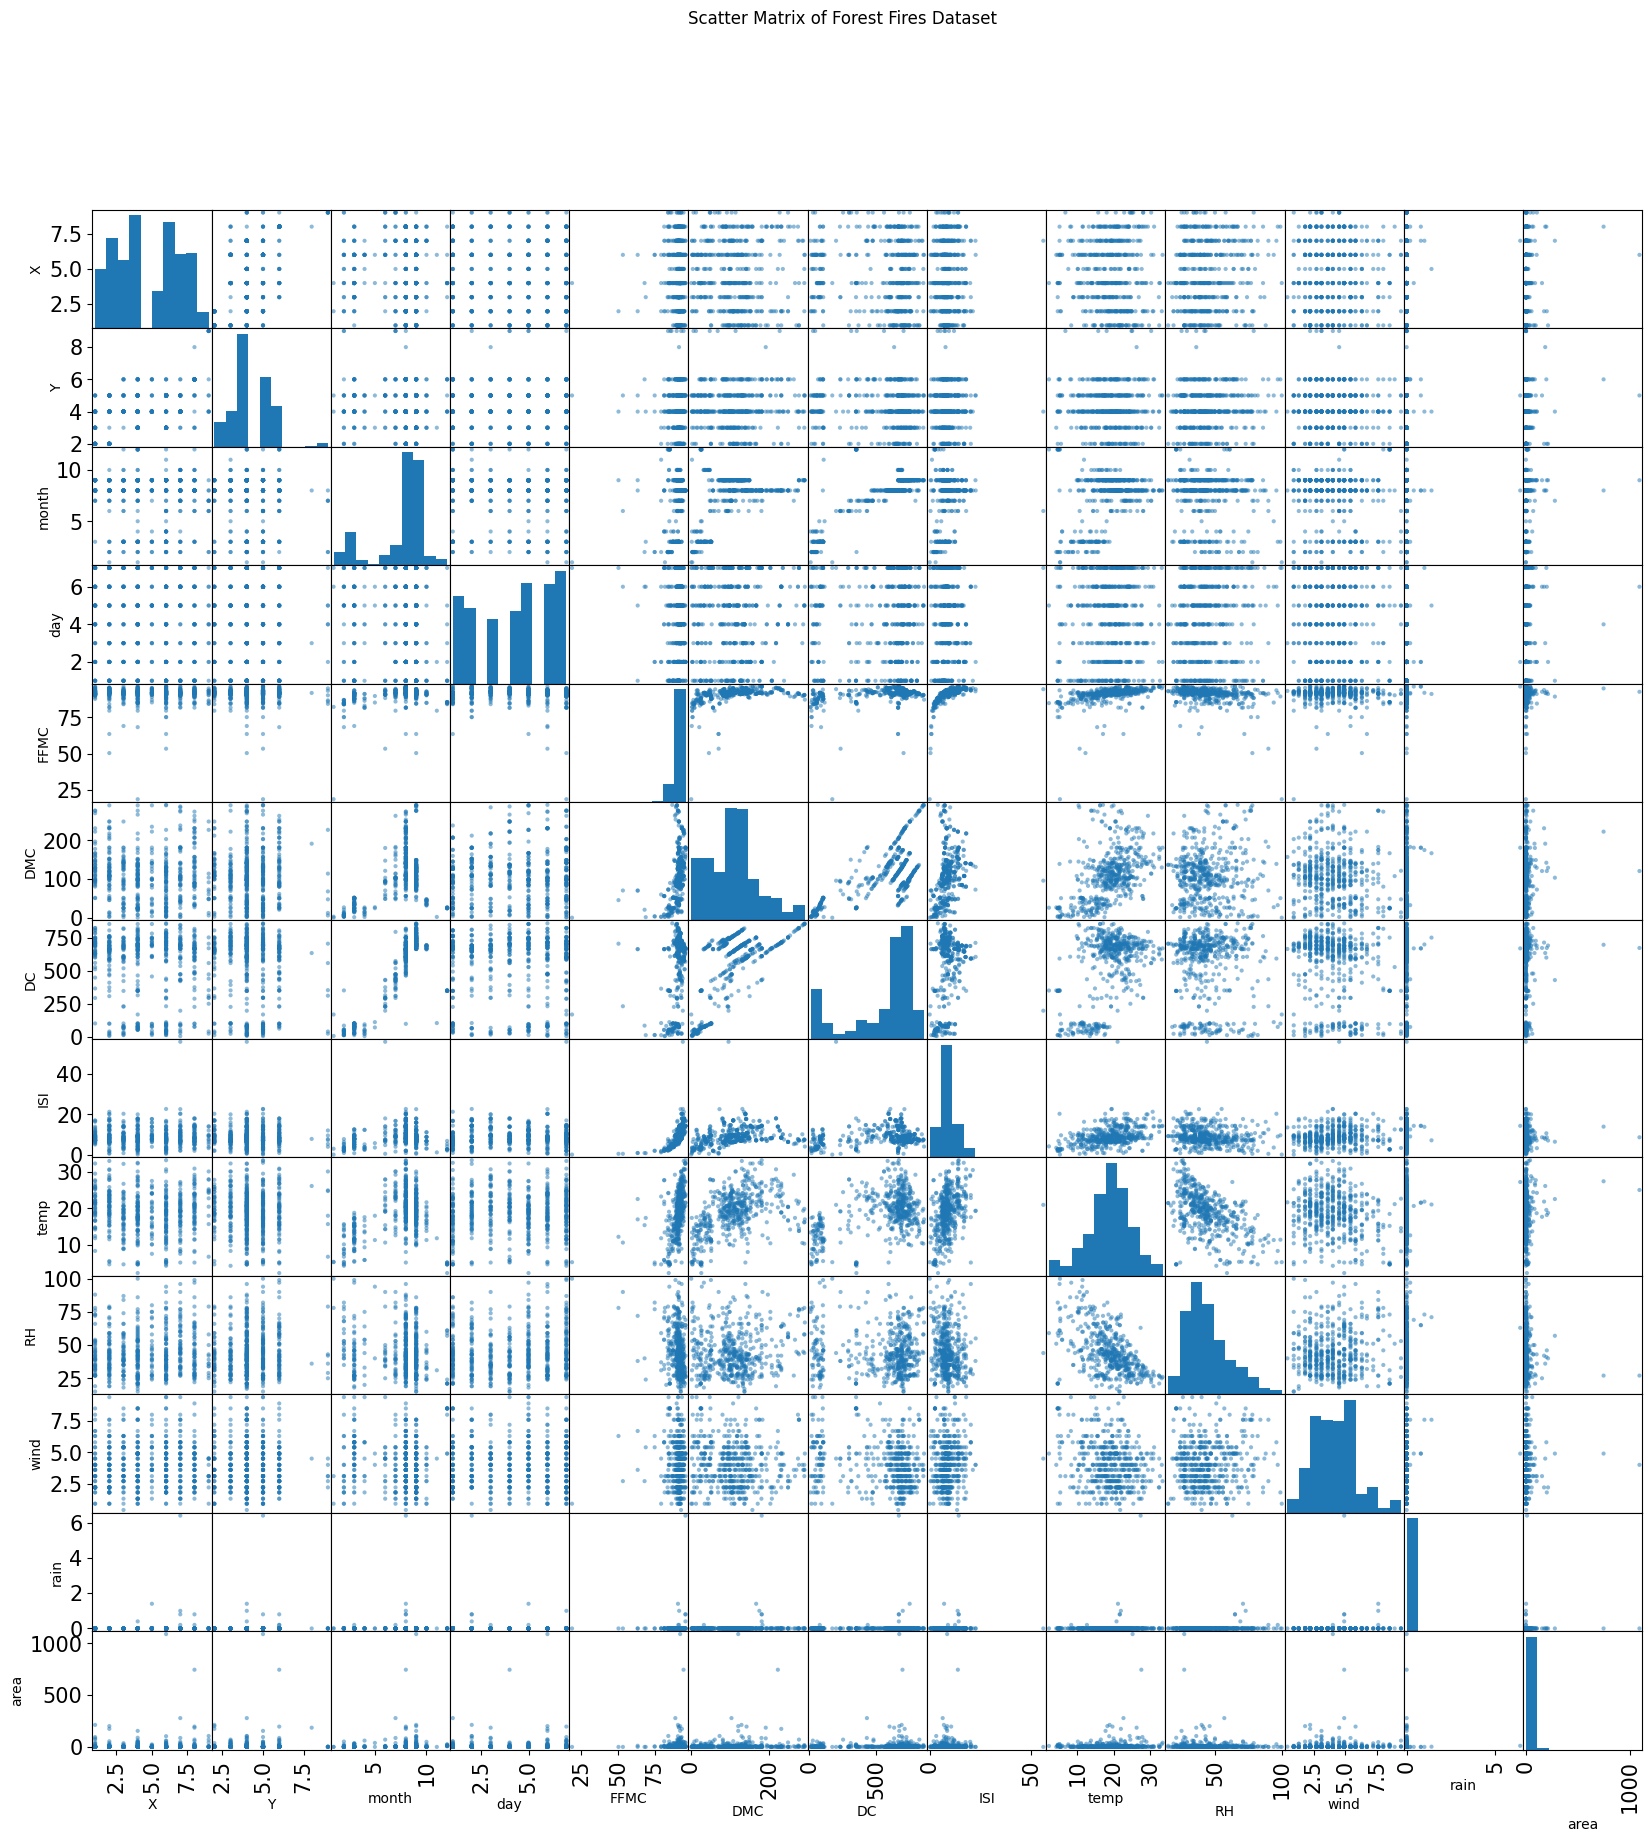

In [13]:
# scatter matrix
from pandas.plotting import scatter_matrix

Axis = scatter_matrix(df, figsize=(20, 20))
plt.suptitle("Scatter Matrix of Forest Fires Dataset")
[plt.setp(item.yaxis.get_majorticklabels(),  "size", 15) for item in Axis.ravel()]
[plt.setp(item.xaxis.get_majorticklabels(),  "size", 15) for item in Axis.ravel()]
plt.show()

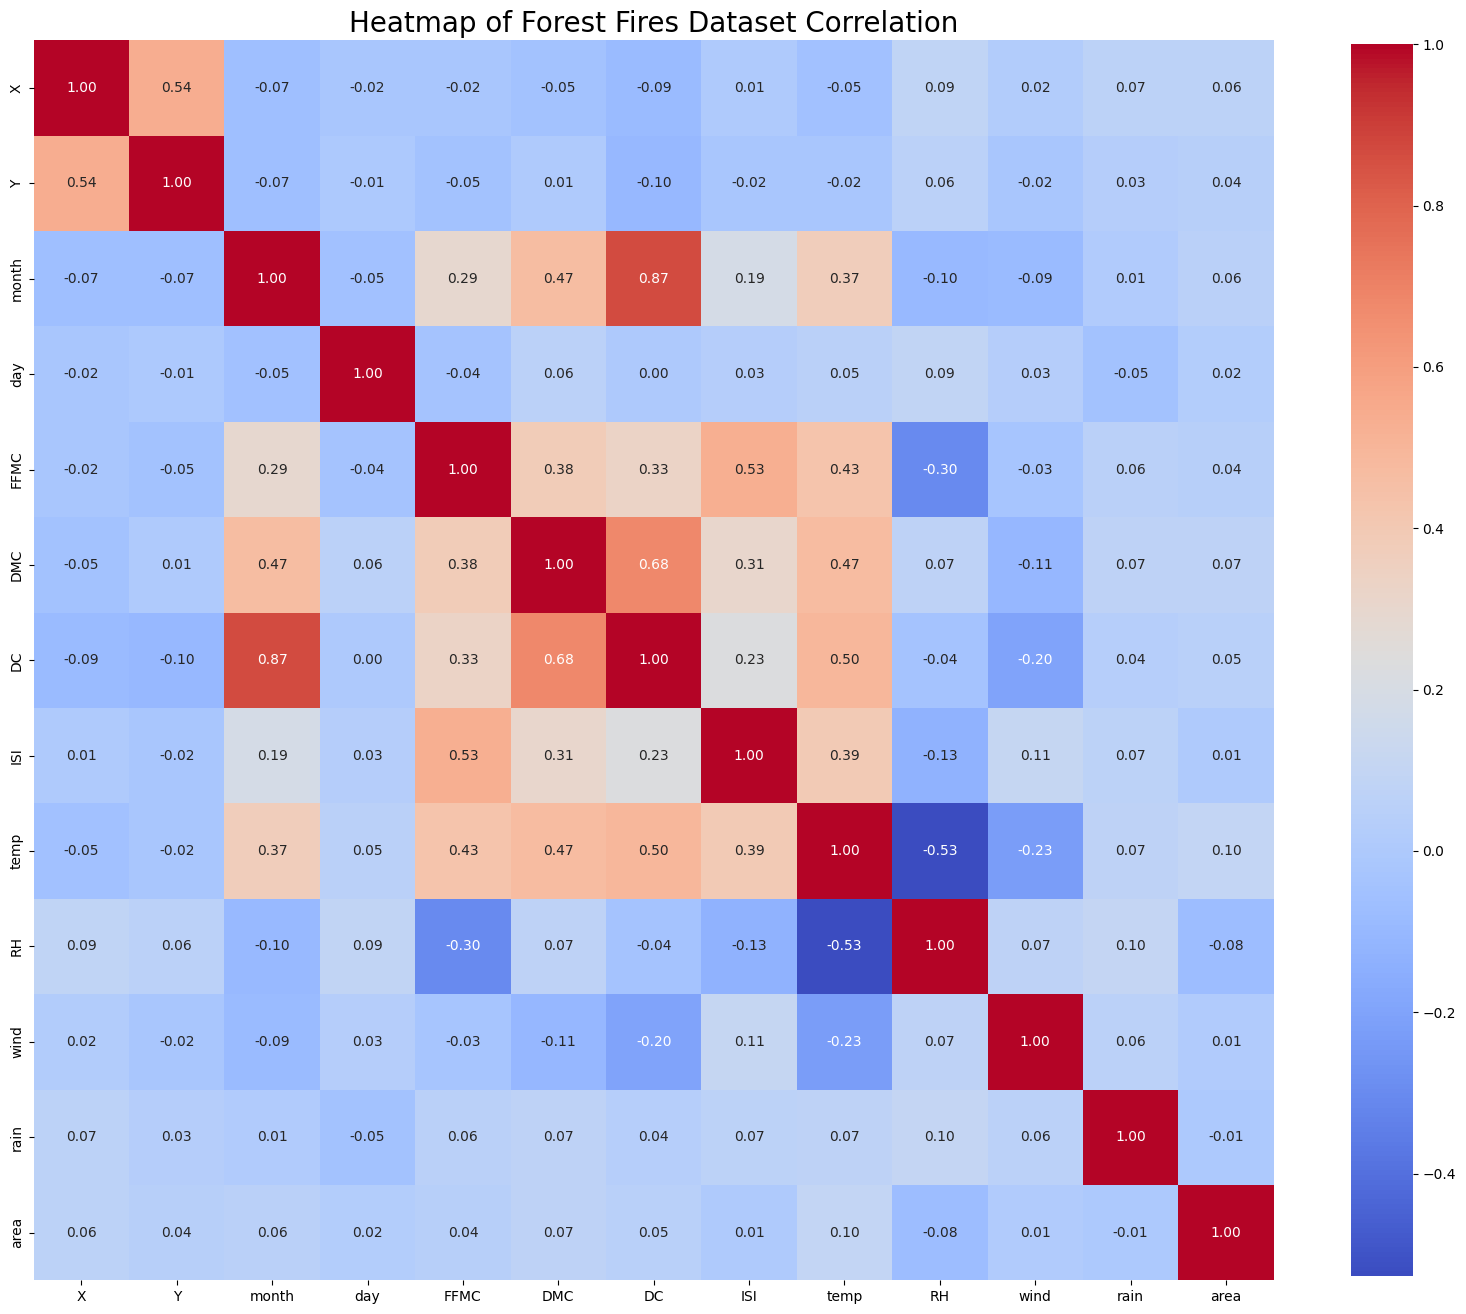

In [14]:
# Heatmap matrix
import seaborn as sns
plt.figure(figsize=(20, 20))
plt.style.use('default')
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Heatmap of Forest Fires Dataset Correlation", fontsize=20)
plt.show()


In [15]:
# train-test split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import numpy as np



In [23]:
# train-test split
X, y = np.arange(10).reshape((5, 2)), range(5)

print("\nX:")
print(X)
print("\ny:")
print(list(y))


X:
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]

y:
[0, 1, 2, 3, 4]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("\nX_train:")
print(X_train)

print("\nX_test:")
print(X_test)

print("\ny_train:")
print(list(y_train))

print("\ny_test:")
print(list(y_test))


X_train:
[[4 5]
 [0 1]
 [6 7]]

X_test:
[[2 3]
 [8 9]]

y_train:
[2, 0, 3]

y_test:
[1, 4]


In [35]:
# K-Fold Cross Validation
dataset = list(range(16))

KFClassValidator = KFold(n_splits=4, shuffle=False)
KFdataset = KFClassValidator.split(dataset)

print("{} {:^61} {}".format("Fold", "Train Indices", "Test Indices"))
for iteration, data in enumerate(KFdataset, start=1):
    print("{:^9} {} {:^25}".format(iteration, data[0], str(data[1])))

Fold                         Train Indices                         Test Indices
    1     [ 4  5  6  7  8  9 10 11 12 13 14 15]         [0 1 2 3]        
    2     [ 0  1  2  3  8  9 10 11 12 13 14 15]         [4 5 6 7]        
    3     [ 0  1  2  3  4  5  6  7 12 13 14 15]       [ 8  9 10 11]      
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11]       [12 13 14 15]      
